In [1]:
#import statements
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

from sklearn.inspection import permutation_importance
import sklearn.metrics as metrics

import xgboost as xgb

from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

In [4]:
# Load dicom dataframe
df = pd.read_feather('../../Data/cleaned_dicom_df.feather')

# Get all lines where BodyPart is Ganzkörper and SliceCount is greater than 600
df = df[((df['BodyPart'] == 'Ganzkörper') | (df['BodyPart'] == 'Stamm')) & (df['SliceCount'] > 400)]

df.head()

,PatientId,PatientAge,PatientSex,PatientWeight,PatientSize,BodyPart,Rows,Columns,SliceCount,PixelSpacing,SliceThickness,PixelArrayFile
0,ANONYM-XT8UJZ,64,M,80.0,1.81,Ganzkörper,512,512,487,0.976562,4.0,Scan_1.npy
1,ANONYM-XT8UJZ_1,56,M,73.0,1.71,Stamm,512,512,567,1.171875,3.0,Scan_2.npy
4,ANONYM-XT8UJZ_3,77,F,74.0,1.63,Stamm,512,512,567,1.171875,3.0,Scan_5.npy
6,ANONYM-XT8UJZ_5,76,F,77.0,1.63,Stamm,512,512,568,1.171875,3.0,Scan_7.npy
10,ANONYM-XT8UJZ_9,51,F,67.0,1.72,Stamm,512,512,567,1.171875,3.0,Scan_11.npy


In [9]:
df['PatientSex'] = df['PatientSex'].apply(lambda x: 0 if x == 'M' else 1)

In [10]:
X = df[['PatientSize', 'PatientSex', 'PatientAge']]
y = df['PatientWeight']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# train a nn model
from sklearn.neural_network import MLPRegressor

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

d:\Programme\anaconda3\envs\R_D\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=42)

In [12]:
# evaluate the model
y_pred = model.predict(X_test_scaled)

# calculate the mean absolute error
mae = metrics.mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 11.495814629263561


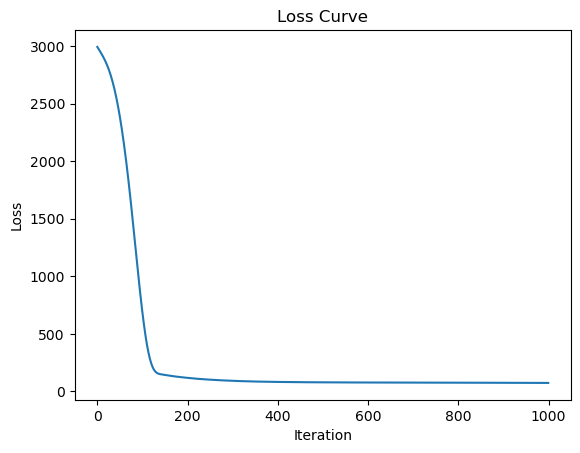

In [13]:
# plot loss curve
plt.plot(model.loss_curve_)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()